<a href="https://colab.research.google.com/github/Zahra-Nafariyeh/Text_Classificaition/blob/main/Glove_text_classificaition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My\ Drive/Glov/2

/content/gdrive/My Drive/Glov/2


In [ ]:
!ls

 1_43_basic_text_classificaition.ipynb
 1_text_classificaition.ipynb
 2_07_text-classification-Emojify.ipynb
 2_text_classificaition.ipynb
'Copy of 07_text-classification-Emojify.ipynb'
 vectors.zip
 vocab.txt


In [ ]:
# z = read_csv('train_emoji.csv')
# z2 = read_csv('tesss.csv')
# z

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline


import csv
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import re
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
# import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TweetTokenizer

# from nltk.stem import WordNetLemmatizerplt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

stop = set(nltk.corpus.stopwords.words('english'))
 


from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
 
# Lemmatization
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> تابع کمکی برای خواند مجموعه داده
</div>


In [ ]:
import csv
def read_csv(filename):
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)

        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)

    return X, Y

In [ ]:
cd /content/gdrive/My\ Drive/Dataset/

/content/gdrive/My Drive/Dataset


In [ ]:
# X_train, Y_train = read_csv('train_emoji.csv')
# X_test, Y_test = read_csv('tesss.csv')


df = pd.read_csv("yelp_review.csv")
df.head(3)
df =df[0:1000]

In [ ]:
print(df.shape)

(1000, 9)


In [ ]:
df.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It's been around since the 30's and they still serve...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu every so often. Cool decor and vibe inside their ...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhood and has been there since 1951. They are known fo...,0,0,0


In [ ]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [ ]:
df.stars.unique()

array([5, 4, 3, 1, 2])

##convert lable, zero start

In [ ]:
df["stars"].replace({1: 0, 2: 1,3: 2, 4: 3,5: 4}, inplace=True)

# print(df)
df[df['stars'] ==5].count()


review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

class 0 :  69
class 1 :  111
class 2 :  259
class 3 :  332
class 4 :  229


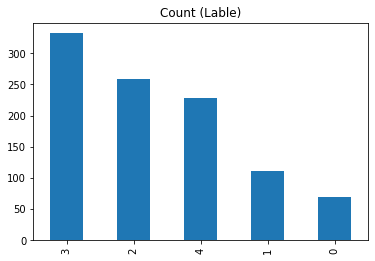

In [ ]:
print("class 0 : ",len(df.loc[df.stars == 0 ])) 
print("class 1 : ",len(df.loc[df.stars == 1 ])) 
print("class 2 : ",len(df.loc[df.stars == 2 ])) 
print("class 3 : ",len(df.loc[df.stars == 3 ])) 
print("class 4 : ",len(df.loc[df.stars == 4 ])) 

target_count = df.stars.value_counts()
target_count.plot(kind='bar', title='Count (Lable)');

In [ ]:
# data = data.target.resample(0)
# print("class 0 : ",data[data.target == 0].shape) 
from sklearn.utils import resample


# Upsample minority class #2770
class_0 = resample( df[df.stars== 0 ], 
                                replace=True,     # sample with replacement
                                n_samples=259,    # to match majority class
                                random_state=123) # reproducible results


class_1 = resample( df[df.stars== 1 ], 
                                replace=True,     # sample with replacement
                                n_samples=259,    # to match majority class
                                random_state=123) # reproducible results

class_2 = resample( df[df.stars== 2 ], 
                                replace=True,     # sample with replacement
                                n_samples=259,    # to match majority class
                                random_state=123) # reproducible results 


class_3 = resample( df[df.stars== 3 ], 
                                replace=True,     # sample with replacement
                                n_samples=259,    # to match majority class
                                random_state=123) # reproducible results



class_4 = resample( df[df.stars== 4 ], 
                                replace=True,     # sample with replacement
                                n_samples=259,    # to match majority class
                                random_state=123) # reproducible results 
                                                                                                                                                                                                                                                                                                         

In [ ]:
df = pd.concat([class_0,class_1,class_2,class_3,class_4 ])#, class_2 ,class_3,
                    #  class_4,class_5, class_6 ,class_7,
                    #  class_8,class_9, class_10 ,class_11])
# df

class 0 :  259
class 1 :  259
class 2 :  259
class 3 :  259
class 4 :  259


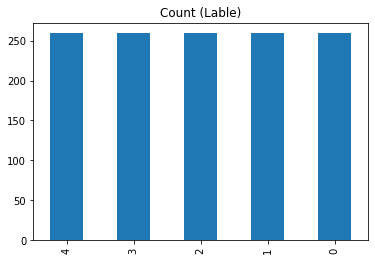

In [ ]:
print("class 0 : ",len(df.loc[df.stars == 0 ])) 
print("class 1 : ",len(df.loc[df.stars == 1 ])) 
print("class 2 : ",len(df.loc[df.stars == 2 ])) 
print("class 3 : ",len(df.loc[df.stars == 3 ])) 
print("class 4 : ",len(df.loc[df.stars == 4 ])) 

target_count = df.stars.value_counts()
target_count.plot(kind='bar', title='Count (Lable)');

In [ ]:
#shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
# res_df.polarity = res_df.polarity.astype('str')
# df

##Preeprocess

In [ ]:
# a['t'] = ['How are you', 'are', 'You']
# a = pd.DataFrame(a)
# a.shape
# a['t'] = a['t'].apply(lambda x: " ".join(x for x in x.split() if  not(x[0].isupper())))
# a['t']


In [ ]:

#############################################################################
#  def Cleaning_df(df):
       #convert all word to lower case
df['text']=df['text'].str.lower()
       #Removes unicode strings like "\u002c" and "x96"
df['text']= df['text'].str.replace(r'(\\u[0-9A-Fa-f]+)', '')

df['text']= df['text'].str.replace(r'[^\x00-\x7f]', '')
       #convert any url to URL

df['text'] = df['text'].replace(r'http\S+', 'URL', regex=True).replace(r'www\S+', 'URL', regex=True)
       #Convert any @Username to "AT_USER"

df['text'] = df['text'].replace('@[^\s]+','AT_USER' ,regex=True)
df['text']=df['text'].str.replace('\d+', '')

# df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split(') if x not in x.isdigit()))

       #tokenize
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
       
       
       #Remove additional white spaces
df['text'] = df['text'].replace('[\s]+', ' ', regex=True)
df['text'] = df['text'].replace('[\n]+', ' ', regex=True)
       #Remove not alphanumeric symbols white spaces

df['text'] = df['text'].replace('[^\w]', ' ', regex=True)

       #Removes hastag in front of a word """

df['text'] = df['text'].replace('#([^\s]+)', r'\1')

        #Remove :( or :)

df['text'] = df['text'].replace(':)','')
df['text'] = df['text'].replace(':(','')

#         #remove number
# df['text']=df['text'].str.replace('\d+', '')
# df['text'] = df['text'].apply(lambda x: "".join([x for x in x.split() if not x.isdigit()]))


#         #remove multiple exclamation
df['text'] = df['text'].replace(r"(\!)\1+", ' ')
#         #remove multiple question marks
df['text'] = df['text'].replace(r"(\?)\1+", ' ')
#         #remove multistop
df['text'] = df['text'].astype(str).replace(r"(\.)\1+", ' ')
#         #Removes emoticons from text
df['text'] = df['text'].str.replace(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "r")

df['text'] = df['text'].str.strip()

#         #remove punctuation
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
        #remove stop word
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

        #correcting spelling
# df['text'].apply(lambda x: str(TextBlob(x).correct()))
        #extracting a root word
df['text'] = df['text'].apply(lambda x: " ".join( ps.stem(x) for x in x.split()))

        #Lemmatization is a process of
        #  extracting a root word by considering the vocabulary. For example, “good,”
        # “better,” or “best” is lemmatized into good
df['text'] = df['text'].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))


################################################################
#حذف اسامی خاص در هر سطر موجود در دیتافریم باید بعد از ریشه یابی انجام شود چون ریشه یابی ممکنه لغت معمولی حاصل کنه
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if  not(x[0].isupper())))

# Make all text as Lower Case
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) 
# Remove Punctuations
df['text'] = df['text'].str.replace('[^\w\s]','')
# Remove \n and \t in each text
df['text'] = df['text'].str.replace('\n',' ', regex=True).replace('\t',' ', regex=True)
# Remove Stopwords
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Find 30 top Common or most frequent Words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:30]
# Find 50 top rare or least frequent Words
rare = pd.Series(' '.join(df['text']).split()).value_counts()[-50:]
# Remove Rare Words
rare = list(rare.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
# Remove Whitespace from beginning and the end of the text
df['text'] = df['text'].str.strip()
# Remove Numbers
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
df.head(3)



# # import these modules 
# from nltk.stem import PorterStemmer 
# from nltk.tokenize import word_tokenize 
   
# ps = PorterStemmer() 
  

  
# for w in words: 
#     print(w, " : ", ps.stem(w)) 


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,iPqFD9u2K2KRK99tcruL_A,nOTl4aPC4tKHK35T3bNauQ,h0TKP2PK0QaAqvqdILU1Vg,3,2015-02-07,went sister boyfriend drink hungri order appet share drink fine mix drink small side food realli...,5,0,0
1,EY1mL968hGQt5xWgILX7gw,u0LXt3Uea_GidxRW1xcsfg,AF_VU15nNsqIg7-y9uiQug,1,2011-01-06,went friend purchas groupon back april groupon review pretti good place sure amount groupon sold...,1,0,1
2,BF0ANB54sc_f-3_howQBCg,ssuXFjkH4neiBgwv-oN4IA,JlNeaOymdVbE6_bubqjohg,0,2014-08-09,alway go chevo chandler delici one ahwatuke differ reason order chicken roll taco today tini lil...,3,0,0


In [ ]:
df = df.drop(columns=['review_id', 'user_id', 'business_id', 'date', 'useful', 'funny','cool'])

In [ ]:
df.stars.unique()

array([3, 1, 0, 2, 4])

In [ ]:
df.columns

Index(['stars', 'text'], dtype='object')

In [ ]:
# X_train,Y_train = df['stars', 'text'][0:8000]


X_train = df['text'][0:800]
Y_train = df['stars'][0:800]

X_test = df['text'][801:1000]   
Y_test = df['stars'][801:1000]
# df_f =tuple((df1,df2))
# X_train

# X_train = X_train.reset_index()
# Y_train = Y_train.reset_index()


# X_test = X_test.reset_index(drop=True)
# Y_test = Y_test.reset_index(drop=True)

In [ ]:
X_test.shape , Y_test.shape

((199,), (199,))

In [ ]:
Y_train.unique()
Y_test.unique()

array([0, 3, 4, 2, 1])

##  مینی بچ ها باید طول یکسان داشته باشند

In [ ]:
maxLen = len(max(X_train, key=len).split())
maxLen

491

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> تابع کمکی تبدیل label ها به Emoji
</div>


In [ ]:
!pip install emoji
import emoji 

emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

def label_to_emoji(label):

    return emoji.emojize(emoji_dictionary[str(label)], use_aliases=True)

In [ ]:
index = 4
print(X_train[index], label_to_emoji(Y_train[index]))

game play fun sure level servic worth price use go time first year open sinc standard serv staff serious gone hill pretti patient person come server last time gone track someon get servic bay let take last night exampl r friend minut someon final came tabl say hello take drink order luckili time decid food otherwis know long would could order eaten food refil chip way thank food runner server brought friend drink forgotten bar instead new one made brought drink tabl almost ice melt track could ask get new one made saw food runner busser twice number time saw actual server whole night place busi top le stellar servic food overpr get ye excel concept interest mediocr best recommend r go choos earlier day spend le game play save time might least worth pay overal experi ⚾


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   تبدیل Labelها به بردار One-Hot
</div>


In [ ]:
Y_train.shape

(800,)

In [ ]:
Y_oh_train =  keras.utils.to_categorical(Y_train,  5)
Y_oh_test =  keras.utils.to_categorical(Y_test, 5)

In [ ]:
index = 50
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

3 is converted into one hot [0. 0. 0. 1. 0.]


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> تابع کمکی برای خواندن embedding از پیش آموزش داده شده.
</div>
##Pretrain  Glov Embedding

In [ ]:
def read_glove_vecs(glove_file):
    with open(glove_file, encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            # print('1zzzzzzzzzzz')
            # print(type(word_to_vec_map))
            # print(word_to_vec_map)
            # print(word_to_vec_map[curr_word])
            # print('2zzzzzzzzzzz')
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [ ]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [ ]:
type(index_to_word)

dict

In [ ]:
# word_to_index['none'] ---> 263564
# word_to_index['akhavanpour']
# word_to_index['unk']--->372306
word_to_vec_map["unk"]

array([-7.9149e-01,  8.6617e-01,  1.1998e-01,  9.2287e-04,  2.7760e-01,
       -4.9185e-01,  5.0195e-01,  6.0792e-04, -2.5845e-01,  1.7865e-01,
        2.5350e-01,  7.6572e-01,  5.0664e-01,  4.0250e-01, -2.1388e-03,
       -2.8397e-01, -5.0324e-01,  3.0449e-01,  5.1779e-01,  1.5090e-02,
       -3.5031e-01, -1.1278e+00,  3.3253e-01, -3.5250e-01,  4.1326e-02,
        1.0863e+00,  3.3910e-02,  3.3564e-01,  4.9745e-01, -7.0131e-02,
       -1.2192e+00, -4.8512e-01, -3.8512e-02, -1.3554e-01, -1.6380e-01,
        5.2321e-01, -3.1318e-01, -1.6550e-01,  1.1909e-01, -1.5115e-01,
       -1.5621e-01, -6.2655e-01, -6.2336e-01, -4.2150e-01,  4.1873e-01,
       -9.2472e-01,  1.1049e+00, -2.9996e-01, -6.3003e-03,  3.9540e-01])

In [ ]:
word = "ali"
index = 113317
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_word[index])

the index of ali in the vocabulary is 51314
the 113317th word in the vocabulary is cucumber


In [ ]:
word_to_vec_map["ali"]

array([-0.71587 ,  0.7874  ,  0.71305 , -0.089955,  1.366   , -1.3149  ,
        0.7309  ,  0.79725 ,  0.47211 ,  0.53347 ,  0.37542 , -0.10256 ,
       -1.0003  , -0.31226 ,  0.26217 ,  0.92426 ,  0.43014 , -0.015593,
        0.4149  ,  0.88286 ,  0.10869 ,  0.95213 ,  1.1807  ,  0.06445 ,
       -0.05814 , -1.797   , -0.18432 , -0.41754 , -0.73625 ,  1.1607  ,
        1.5932  , -0.70268 , -0.61621 ,  0.47118 ,  0.95046 ,  0.35206 ,
        0.6072  ,  0.59339 , -0.47091 ,  1.4916  ,  0.27146 ,  1.8252  ,
       -1.2073  , -0.80058 ,  0.52558 , -0.33346 , -1.4102  , -0.21514 ,
        0.12945 , -0.69603 ])

################################
##Part 2

In [ ]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   تبدیل جمله به indexها 
</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">  
این تابع طول تمام جمله ها را نیز یکسان میکند.
</div>



In [ ]:

def sentences_to_indices(X, word_to_index, max_len):
    # print('1zzzzzzzzzzzzzzzzzzzzz')
    # print('یعنی چندتا جمله داریم1:',X.shape)
    m = X.shape[0]                                   # number of training examples
    
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):                               # loop over training examples
        # print('2zzzzzzzzzzzzzzzzzzzzz')

        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        try:
            sentence_words = X[i].lower().split()
            # print('2یعنی چندتا جمله داریم:',X.shape)
        except:
            sentence_words = X[i].split()
            # print('EEzzzzzzzzzzzzzzzzzzzzz')
        # Loop over the words of sentence_words
        # print('AE2zzzzzzzzzzzzzzzzzzzzz')
        for j, w in enumerate(sentence_words):
            # Set the (i,j)th entry of X_indices to the index of the correct word.

            try:
                X_indices[i, j] = word_to_index[w]
                # print('3zzzzzzzzzzzzzzzzzzzzz')
            except:
                
                X_indices[i, j] = 372306
                
            # print('5یعنی چندتا جمله داریم:',X.shape)
    return X_indices

Run the following cell to check what `sentences_to_indices()` does, and check your results.

In [ ]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   تابعی برای ایجاد لایه Embedding و لود وزن های از پیش آموزش داده شده 
</div>

In [ ]:
from keras.layers import Embedding
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    embedding_layer = Embedding(vocab_len, emb_dim, trainable = False)

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

## 2.3 Building the Emojifier-V2


In [ ]:
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.models import Model

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):

    # Define sentence_indices as the input of the graph, it should be of shape input_shape and dtype 'int32' (as it contains indices).
    # #####################################################

    sentence_indices = Input(input_shape, dtype = np.int32)
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer, you get back the embeddings
    embeddings = embedding_layer(sentence_indices)
    
    # ###########################################################

    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
    X = Dense(5, activation = 'softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(sentence_indices, X)
    
    
    return model

In [ ]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 491)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 491, 50)           20000050  
_________________________________________________________________
lstm (LSTM)                  (None, 491, 128)          91648     
_________________________________________________________________
dropout (Dropout)            (None, 491, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

def sentences_to_indices(X, word_to_index, max_len):
    # print('1zzzzzzzzzzzzzzzzzzzzz')
    # print('یعنی چندتا جمله داریم1:',X.shape)
    m = X.shape[0]                                   # number of training examples
    
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):                               # loop over training examples
        # print('2zzzzzzzzzzzzzzzzzzzzz')

        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        try:
            sentence_words = X[i].lower().split()
            # print('2یعنی چندتا جمله داریم:',X.shape)
        except:
            sentence_words = X[i].split()
            # print('EEzzzzzzzzzzzzzzzzzzzzz')
        # Loop over the words of sentence_words
        # print('AE2zzzzzzzzzzzzzzzzzzzzz')
        for j, w in enumerate(sentence_words):
            # Set the (i,j)th entry of X_indices to the index of the correct word.

            try:
                X_indices[i, j] = word_to_index[w]
                # print('3zzzzzzzzzzzzzzzzzzzzz')
            except:
                
                # print(i,j)
                X_indices[i, j] = 372306
                
            # print('5یعنی چندتا جمله داریم:',X.shape)
    return X_indices

In [ ]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = keras.utils.to_categorical(Y_train, 5)

In [ ]:
model.fit(X_train_indices, Y_train_oh, epochs = 5, batch_size = 32, shuffle=True)

Epoch 1/5
25/25 [==============================] - 23s 920ms/step - loss: 1.6105 - accuracy: 0.1950
Epoch 2/5
25/25 [==============================] - 23s 918ms/step - loss: 1.6083 - accuracy: 0.2288
Epoch 3/5
25/25 [==============================] - 23s 925ms/step - loss: 1.6082 - accuracy: 0.2262
Epoch 4/5
25/25 [==============================] - 24s 942ms/step - loss: 1.6087 - accuracy: 0.2262
Epoch 5/5
25/25 [==============================] - 23s 920ms/step - loss: 1.6056 - accuracy: 0.2250


In [ ]:
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [ ]:
X_test_indices = sentences_to_indices(X_test, word_to_index,  maxLen)
Y_test_oh = keras.utils.to_categorical(Y_test, 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

7/7 [==============================] - 1s 200ms/step - loss: 1.6206 - accuracy: 0.1256

Test accuracy =  0.12562814354896545


You should get a test accuracy between 80% and 95%. Run the cell below to see the mislabelled examples. 

In [ ]:
# This code allows you to see the mislabelled examples
C = 5
# y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:❤️ prediction: realli excit hear restaur come toronto final open friend realli excit tri place servic great felt like forgotten u nt care servic everyth came one time friend order ginger beer came two separ time almost go back make long took absolut vegetarian option except one cold noodl mushroom bun vegetarian pork belli bun noth special piec meat bun vegetarian friend order bun plain could experi well liter gave u plain sauc kimchi momofuko ramen aw bland mushi bite could nt handl eat anymor momofuko place go want real ramen better experi instant noodl😞
Expected emoji:❤️ prediction: could give offic star would refer offic friend found husband colon issu extrem sick need dr set appt almost week time told need medic record sent offic even day appoint still mention medic record receiv wait wait room minut call back girl work told u dr would see u hasnt seen medic record husband made appoint person took note mention prior current issu kid husband total love go gi dr fun s

Now you can try it on your own example. Write your own sentence below. 

In [ ]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(['not feeling happy'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

not feeling happy 😞
